# Random forest
In the following we use the Random Forest method on the converted data from the descriptive_analysis.ipynb

Source Random Forest Model: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 
Source Kfold Cross Validation on Random Forests: https://www.youtube.com/watch?v=gJo0uNL-5Qw 
Source Gradient Boosting on Random Forest: https://towardsdatascience.com/gradient-boosting-using-random-forests-for-application-on-the-new-york-taxi-fare-prediction-f6101c592bf9
Tuning Hyperparameters with GridSearch: https://www.youtube.com/watch?v=HdlDYng8g9s

The following Python code loads in the csv data and displays the structure of the data: 

In [81]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data, set index to column 0, parse dates and display first 5 rows
test = pd.read_csv('./data/converted_test_2020_07_15_12-33-08.csv', index_col=0, parse_dates=['Flight_Date','Request_Date'])

training_features = pd.read_csv('./data/converted_train_2020_07_15_12-33-08.csv', index_col=0, parse_dates=['Flight_Date','Request_Date'])
training_features.head(5)

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price,...,min_future_price_in_eur,Request_Weekday,Request_timeofday,Departure_timeofday,flight_distance_km,Request_hour,Request_Date_Month,Flight_Date_Month,route_abb_from,route_abb_to
0,2019-06-03 11:00:00,2019-06-05 19:00:00,56.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07,...,259.070000,Monday,Morning,Evening,907.2,11:00,6,6,SXF,STN
1,2019-06-03 23:00:00,2019-06-05 19:00:00,44.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,...,259.070000,Monday,Night,Evening,907.2,23:00,6,6,SXF,STN
2,2019-06-04 11:00:00,2019-06-05 19:00:00,32.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,...,259.070000,Tuesday,Morning,Evening,907.2,11:00,6,6,SXF,STN
3,2019-06-04 23:00:00,2019-06-05 19:00:00,20.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,...,259.070000,Tuesday,Night,Evening,907.2,23:00,6,6,SXF,STN
4,2019-06-03 11:00:00,2019-06-05 21:00:00,58.0,21:00,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37,...,252.059401,Monday,Morning,Night,907.2,11:00,6,6,STN,SXF


In [82]:
# drop the columns we do not need
test = test.drop(columns=['Price', 'Currency'])
training_features = training_features.drop(columns=['Price', 'Currency', 'min_future_price'])

# should be rounded in the file data conversion
test.round(2)
training_features.round(2)

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,price_in_eur,min_future_price_in_eur,Request_Weekday,Request_timeofday,Departure_timeofday,flight_distance_km,Request_hour,Request_Date_Month,Flight_Date_Month,route_abb_from,route_abb_to
0,2019-06-03 11:00:00,2019-06-05 19:00:00,56.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,208.07,259.07,Monday,Morning,Evening,907.2,11:00,6,6,SXF,STN
1,2019-06-03 23:00:00,2019-06-05 19:00:00,44.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,259.07,Monday,Night,Evening,907.2,23:00,6,6,SXF,STN
2,2019-06-04 11:00:00,2019-06-05 19:00:00,32.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,259.07,Tuesday,Morning,Evening,907.2,11:00,6,6,SXF,STN
3,2019-06-04 23:00:00,2019-06-05 19:00:00,20.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,259.07,Tuesday,Night,Evening,907.2,23:00,6,6,SXF,STN
4,2019-06-03 11:00:00,2019-06-05 21:00:00,58.0,21:00,2019-06-05 FR 147,STN-SXF,FR 147,143.86,252.06,Monday,Morning,Night,907.2,11:00,6,6,STN,SXF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83619,2019-08-01 11:00:00,2019-09-10 10:00:00,959.0,10:00,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,39.69,Thursday,Morning,Morning,907.2,11:00,8,9,SXF,STN
83620,2019-08-01 23:00:00,2019-09-10 10:00:00,947.0,10:00,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,39.69,Thursday,Night,Morning,907.2,23:00,8,9,SXF,STN
83621,2019-08-02 11:00:00,2019-09-10 10:00:00,935.0,10:00,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,39.69,Friday,Morning,Morning,907.2,11:00,8,9,SXF,STN
83622,2019-08-02 23:00:00,2019-09-10 10:00:00,923.0,10:00,2019-09-10 FR 8543,SXF-STN,FR 8543,39.69,39.69,Friday,Night,Morning,907.2,23:00,8,9,SXF,STN


In [66]:
# Show how many entries and columns, and if there are null-values and show the data types 
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83624 entries, 0 to 83623
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Request_Date             83624 non-null  datetime64[ns]
 1   Flight_Date              83624 non-null  datetime64[ns]
 2   Duration_Time            83624 non-null  float64       
 3   Departure_hour           83624 non-null  object        
 4   flight_unique_id         83624 non-null  object        
 5   route_abb                83624 non-null  object        
 6   flight_number            83624 non-null  object        
 7   price_in_eur             83624 non-null  float64       
 8   min_future_price_in_eur  83624 non-null  float64       
 9   Request_Weekday          83624 non-null  object        
 10  Request_timeofday        83624 non-null  object        
 11  Departure_timeofday      83624 non-null  object        
 12  flight_distance_km       83624 n

In [46]:
print('The shape of our features is:', training_features.shape)

The shape of our features is: (83624, 18)


We notice that we have 83.624 rows and 18 columns with 17 features. We have no missing date or null values in our data set. 
To identify any anomalies we compute the summary statistics and make some plots. 

In [47]:
# Descriptive statistics for each column
training_features.describe()

,Duration_Time,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Date_Month,Flight_Date_Month
count,83624.000000,83624.000000,83624.000000,83624.000000,83624.000000,83624.000000
mean,929.921147,71.954198,56.698702,805.252909,6.456125,7.706185
std,548.569008,54.780372,46.164459,137.934369,0.545032,0.826904
min,19.000000,8.990000,8.990000,618.630000,6.000000,6.000000
25%,475.000000,32.760371,22.368936,618.630000,6.000000,7.000000
50%,883.000000,55.070000,42.056918,907.200000,6.000000,8.000000
75%,1328.000000,91.790000,73.430000,907.200000,7.000000,8.000000
max,2375.000000,372.956297,311.090000,907.200000,8.000000,9.000000


There are not any data points immediately appear as anomalous and no zeros in any of the measurement columns. 

In [48]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('seaborn')

We plot the requested prices and min_future_prices on a 2-D graph to eyeball the data and see if we can manually find any relationship between the data.

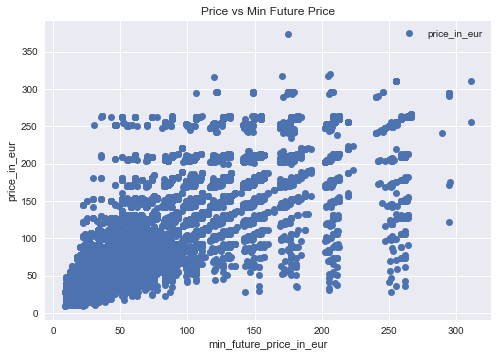

In [8]:
training_features.plot(x='min_future_price_in_eur', y='price_in_eur', style='o')  
plt.title('Price vs Min Future Price')  
plt.xlabel('min_future_price_in_eur')  
plt.ylabel('price_in_eur')  
plt.show()

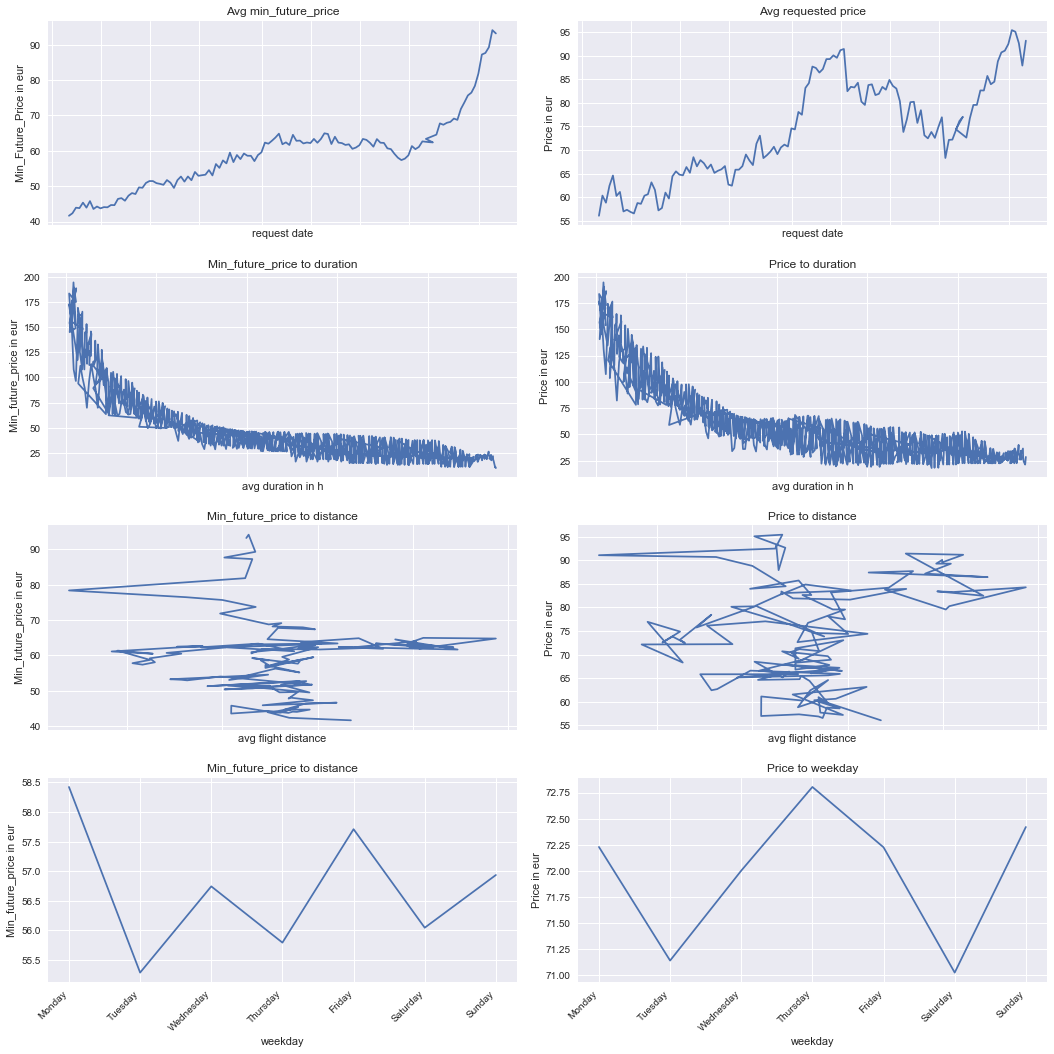

In [9]:
# Calculate average values and unique dates for the plots
dates = training_features.Request_Date.unique()
days = training_features.Request_Weekday.unique()
#time_of_day = training_features.Request_timeofday.unique()
duration = training_features.Duration_Time.unique()
distance = training_features.flight_distance_km.unique()

mean_min_feature_price = training_features.groupby('Request_Date').min_future_price_in_eur.mean()
mean_price_in_eur = training_features.groupby('Request_Date').price_in_eur.mean()
#mean_duration_time = training_features.groupby('Request_Date').Duration_Time.mean()
mean_flight_distance = training_features.groupby('Request_Date').flight_distance_km.mean()
mean_price_duration = training_features.groupby('Duration_Time').price_in_eur.mean()
mean_min_future_duration = training_features.groupby('Duration_Time').min_future_price_in_eur.mean()
mean_price_distance = training_features.groupby('flight_distance_km').price_in_eur.mean()
#mean_min_future_distance = training_features.groupby('flight_distance_km').min_future_price_in_eur.mean()
mean_price_weekday = training_features.groupby('Request_Weekday').price_in_eur.mean()
mean_min_future_weekday = training_features.groupby('Request_Weekday').min_future_price_in_eur.mean()
#mean_price_time_of_day = training_features.groupby('Request_timeofday').price_in_eur.mean()
#mean_min_future_time_of_day = training_features.groupby('Request_timeofday').min_future_price_in_eur.mean()


# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (15,15))
fig.autofmt_xdate(rotation = 45)


# avg min_future_price_in_eur compared to the request date
ax1.plot(dates, mean_min_feature_price)
ax1.set_xlabel('request date'); ax1.set_ylabel('Min_Future_Price in eur'); ax1.set_title('Avg min_future_price')

# avg price in eur compared to the request date
ax2.plot(dates, mean_price_in_eur)
ax2.set_xlabel('request date'); ax2.set_ylabel('Price in eur'); ax2.set_title('Avg requested price')

# avg min_future_price_in_eur compared to the avg duration time
ax3.plot(duration, mean_min_future_duration)
ax3.set_xlabel('avg duration in h'); ax3.set_ylabel('Min_future_price in eur'); ax3.set_title('Min_future_price to duration')

# avg price in eur compared to the avg duration time
ax4.plot(duration, mean_price_duration)
ax4.set_xlabel('avg duration in h'); ax4.set_ylabel('Price in eur'); ax4.set_title('Price to duration')

# avg min_future_price_in_eur compared to the avg flight distance
ax5.plot(mean_flight_distance, mean_min_feature_price)
ax5.set_xlabel('avg flight distance'); ax5.set_ylabel('Min_future_price in eur'); ax5.set_title('Min_future_price to distance')

# avg price_in_eur compared to the avg flight distance
ax6.plot(mean_flight_distance, mean_price_in_eur)
ax6.set_xlabel('avg flight distance'); ax6.set_ylabel('Price in eur'); ax6.set_title('Price to distance')

# avg min_future_price_in_eur compared to the weekday
ax7.plot(days, mean_min_future_weekday)
ax7.set_xlabel('weekday'); ax7.set_ylabel('Min_future_price in eur'); ax7.set_title('Min_future_price to distance')

# avg price_in_eur compared to the weekday
ax8.plot(days, mean_price_weekday)
ax8.set_xlabel('weekday'); ax8.set_ylabel('Price in eur'); ax8.set_title('Price to weekday')

# avg price_in_eur compared to the avg flight distance
#ax9.plot(time_of_day, mean_min_future_time_of_day)
#ax9.set_xlabel('time of day'); ax9.set_ylabel('Min_future_price in eur'); ax9.set_title('Min_future_price to time of day')

# avg price_in_eur compared to the avg flight distance
#ax10.plot(time_of_day, mean_price_time_of_day)
#ax10.set_xlabel('time of day'); ax10.set_ylabel('Price in eur'); ax10.set_title('Price to time of day')

plt.tight_layout(pad=2)

Examining the quantitative statistics and graphs, we can feel confident in the high quality of our data. There are no clear outliers. We can also notice that the average min_future_price and the average requested price increase when the request date is later. The prices and min_future_price increase when the duration time between the flight date and request date is short. 
We notice also that the prices are on Tuesday and Saturday the lowest and on Wedenesday it is the highest, and on monday, friday and sunday it is also high. 

In [49]:
# import numpy for normalization
import numpy as np

#training_features_log = [['min_future_price_in_eur', 'Duration_Time', 'price_in_eur', 'flight_distance_km']]
#for feature in training_features_log:
#    training_features[feature] = np.log1p(training_features[feature])
    

#testing_features_log = [['Duration_Time', 'price_in_eur', 'flight_distance_km']]
#for feature in testing_features_log:
#    test[feature] = np.log1p(test[feature])

training_features

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,price_in_eur,min_future_price_in_eur,Request_Weekday,Request_timeofday,Departure_timeofday,flight_distance_km,Request_hour,Request_Date_Month,Flight_Date_Month,route_abb_from,route_abb_to
0,2019-06-03 11:00:00,2019-06-05 19:00:00,56.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,208.070000,259.070000,Monday,Morning,Evening,907.2,11:00,6,6,SXF,STN
1,2019-06-03 23:00:00,2019-06-05 19:00:00,44.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.070000,259.070000,Monday,Night,Evening,907.2,23:00,6,6,SXF,STN
2,2019-06-04 11:00:00,2019-06-05 19:00:00,32.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.070000,259.070000,Tuesday,Morning,Evening,907.2,11:00,6,6,SXF,STN
3,2019-06-04 23:00:00,2019-06-05 19:00:00,20.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.070000,259.070000,Tuesday,Night,Evening,907.2,23:00,6,6,SXF,STN
4,2019-06-03 11:00:00,2019-06-05 21:00:00,58.0,21:00,2019-06-05 FR 147,STN-SXF,FR 147,143.864678,252.059401,Monday,Morning,Night,907.2,11:00,6,6,STN,SXF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83619,2019-08-01 11:00:00,2019-09-10 10:00:00,959.0,10:00,2019-09-10 FR 8543,SXF-STN,FR 8543,35.690000,39.690000,Thursday,Morning,Morning,907.2,11:00,8,9,SXF,STN
83620,2019-08-01 23:00:00,2019-09-10 10:00:00,947.0,10:00,2019-09-10 FR 8543,SXF-STN,FR 8543,46.830000,39.690000,Thursday,Night,Morning,907.2,23:00,8,9,SXF,STN
83621,2019-08-02 11:00:00,2019-09-10 10:00:00,935.0,10:00,2019-09-10 FR 8543,SXF-STN,FR 8543,46.830000,39.690000,Friday,Morning,Morning,907.2,11:00,8,9,SXF,STN
83622,2019-08-02 23:00:00,2019-09-10 10:00:00,923.0,10:00,2019-09-10 FR 8543,SXF-STN,FR 8543,39.690000,39.690000,Friday,Night,Morning,907.2,23:00,8,9,SXF,STN


# Data preparation
We will now do some minor modifications to put our data into machine-understandable terms. We will use the Python library Pandas for the data manipulation relying on the structure known as dataframe.

The first step is the one-hot-encoding of the data. This process takes categorical variables, such as days of the week and converts it to a numerical representation without an arbitrary ordering.

In [83]:
# One Hot encoding for categorical values
training_features = pd.get_dummies(training_features, columns=['Request_Weekday', 'Request_timeofday', 'Departure_timeofday', 'route_abb_from', 'route_abb_to', 'Departure_hour'])
test = pd.get_dummies(test, columns=['Request_Weekday', 'Request_timeofday', 'Departure_timeofday', 'route_abb_from', 'route_abb_to', 'Departure_hour'])

In [84]:
print('The shape of our features is:', training_features.shape)

The shape of our features is: (83624, 39)


In [69]:
# Descriptive statistics for each column 
#training_features.describe()

In [85]:
# Add train column
test['train'] = 0
training_features['train'] = 1

# Equal columns across both tables
combined = pd.concat([training_features,test], sort=False)
training_features = combined[combined['train'] == 1]
test = combined[combined['train'] == 0]

# Fill NaN with 0
training_features = training_features.fillna(0)
test = test.fillna(0)

# Drop train column
test.drop(['train'], axis=1, inplace=True)
training_features.drop(['train'], axis=1, inplace=True)
test

,Request_Date,Flight_Date,Duration_Time,flight_unique_id,route_abb,flight_number,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_hour,...,route_abb_to_SXF,Departure_hour_10:00,Departure_hour_18:00,Departure_hour_19:00,Departure_hour_21:00,Departure_hour_22:00,Departure_hour_6:00,Departure_hour_7:00,Departure_hour_8:00,Departure_hour_9:00
0,2019-06-03 11:00:00,2019-07-02 07:00:00,692.0,2019-07-02 FR 145,STN-SXF,FR 145,30.321154,0.0,907.2,11:00,...,1,0,0,0,0,0,0,1,0,0.0
1,2019-06-03 23:00:00,2019-07-02 07:00:00,680.0,2019-07-02 FR 145,STN-SXF,FR 145,44.528200,0.0,907.2,23:00,...,1,0,0,0,0,0,0,1,0,0.0
2,2019-06-04 11:00:00,2019-07-02 07:00:00,668.0,2019-07-02 FR 145,STN-SXF,FR 145,44.467984,0.0,907.2,11:00,...,1,0,0,0,0,0,0,1,0,0.0
3,2019-06-04 23:00:00,2019-07-02 07:00:00,656.0,2019-07-02 FR 145,STN-SXF,FR 145,44.467984,0.0,907.2,23:00,...,1,0,0,0,0,0,0,1,0,0.0
4,2019-06-05 11:00:00,2019-07-02 07:00:00,644.0,2019-07-02 FR 145,STN-SXF,FR 145,44.521668,0.0,907.2,11:00,...,1,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,2019-07-30 23:00:00,2019-08-02 22:00:00,71.0,2019-08-02 FR 8545,SXF-STN,FR 8545,42.830000,0.0,907.2,23:00,...,0,0,0,0,0,1,0,0,0,0.0
5579,2019-07-31 11:00:00,2019-08-02 22:00:00,59.0,2019-08-02 FR 8545,SXF-STN,FR 8545,50.990000,0.0,907.2,11:00,...,0,0,0,0,0,1,0,0,0,0.0
5580,2019-07-31 23:00:00,2019-08-02 22:00:00,47.0,2019-08-02 FR 8545,SXF-STN,FR 8545,50.990000,0.0,907.2,23:00,...,0,0,0,0,0,1,0,0,0,0.0
5581,2019-08-01 11:00:00,2019-08-02 22:00:00,35.0,2019-08-02 FR 8545,SXF-STN,FR 8545,50.990000,0.0,907.2,11:00,...,0,0,0,0,0,1,0,0,0,0.0


In the next step we separate the data into the features and targets. The target, also known as the label, is the value we want to predict, in this case the min_future_price and the features are all the columns the model uses to make a prediction. We will also convert the Pandas dataframes to Numpy arrays because that is the way the algorithm works. (I save the column headers, which are the names of the features, to a list to use for later visualization).

In [86]:
# Drop columns we do not need from train
training_features = training_features.drop(columns=['route_abb', 'flight_unique_id', 'Request_Date', 'Flight_Date','Request_Date_Month', 'Flight_Date_Month', 'Request_hour', 'flight_number'])

# Drop columns we do not need from test
test = test.drop(columns=['route_abb', 'flight_unique_id', 'min_future_price_in_eur', 'Request_Date', 'Flight_Date','Request_Date_Month', 'Flight_Date_Month', 'Request_hour', 'flight_number'])

In [72]:
# Use numpy to convert to arrays
# Labels are the values we want to predict
#labels = np.array(training_features['min_future_price_in_eur'])

# Remove the labels from the features
# axis 1 refers to the columns
#training_features = training_features.drop('min_future_price_in_eur', axis = 1)

# Saving feature names for later use
#feature_list = list(training_features.columns)

# Convert to numpy array
#training_features = np.array(training_features)

In [88]:
# Use numpy to convert to arrays
# y is the value we want to predict
y = np.array(training_features['min_future_price_in_eur'])

# Remove the labels from the features
# axis 1 refers to the columns
X = training_features.drop('min_future_price_in_eur', axis = 1)

# Saving feature names for later use
feature_list = list(X.columns)

# Convert to numpy array
X = np.array(X)

# Feature Importance

In [73]:
from sklearn.linear_model import LassoCV

# Features with the highest absolute coef_ value are considered the most important
#feature_names = feature_list
#clf = LassoCV(cv=100).fit(X, y)
#print(clf.score(X, y))
#importance = np.abs(clf.coef_)
#print(importance)

# Splitting data into training and testing sets
During training, we let the model ‘see’ the answers, in this case the min_future_price_inr_eur, so it can learn how to predict the price from the features. We expect there to be some relationship between all the features and the target value, and the model’s job is to learn this relationship during training. 
I am setting the random state to 42 which means the results will be the same each time I run the split for reproducible results.

The following code splits the data sets with another single line:

In [89]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

We look at the shape of all the data to make sure we did everything correctly. The training features number of columns match the testing feature number of columns and the number of rows match for the respective training and testing features and the labels:

In [90]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (66899, 30)
Training Labels Shape: (66899,)
Testing Features Shape: (16725, 30)
Testing Labels Shape: (16725,)


Before we can make and evaluate predictions, we need to establish a baseline. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model. The baseline prediction for our case can be the historical min future price averages. In other words, our baseline is the error we would get if we simply predicted the average min future price for all flight requests.

In [60]:
# The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index(average_min_future_price)]

# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - test_labels)

#print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [91]:
X

array([[ 56.  , 208.07, 907.2 , ...,   0.  ,   0.  ,   0.  ],
       [ 44.  , 259.07, 907.2 , ...,   0.  ,   0.  ,   0.  ],
       [ 32.  , 259.07, 907.2 , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [935.  ,  46.83, 907.2 , ...,   0.  ,   0.  ,   0.  ],
       [923.  ,  39.69, 907.2 , ...,   0.  ,   0.  ,   0.  ],
       [911.  ,  39.69, 907.2 , ...,   0.  ,   0.  ,   0.  ]])

# Train the model

In [94]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 50 decision trees
rf_reg = RandomForestRegressor(n_estimators = 40, random_state = 42)

# Train the model on training data
rf_model = rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

In [95]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_reg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [96]:
rf_model.score(X_test, y_test)

0.8737959065431571

In [97]:
# Use the forest's predict method on the test data
predictions = rf_reg.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 9.05 degrees.


In [98]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.1 %.


In [19]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [20]:
def get_score(model, train_features, test_features, train_labels, test_labels):
    model.fit(train_features, train_labels)
    return model.score(test_features, test_labels)

In [21]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [22]:
scores_rf = []

for train_index, test_index in kf.split(training_features):
    train_features, test_features, train_labels, test_labels = training_features[train_index], training_features[test_index], labels[train_index], labels[test_index]
    scores_rf.append(get_score(RandomForestRegressor(n_estimators=40), train_features, test_features, train_labels, test_labels))

In [23]:
scores_rf

[0.7410091988800555, 0.7614847331621946, 0.7141632249625798]

In [24]:
from sklearn.model_selection import cross_val_score

# using cross validation score
cross_val_score(RandomForestRegressor(n_estimators=40), training_features, labels)

array([0.68971711, 0.76205439, 0.74206152, 0.72549359, 0.77653767])

# Make Predictions on the Test Set
Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features. We then compare the predictions to the known answers. When performing regression, we need to make sure to use the absolute error because we expect some of our answers to be low and some to be high. We are interested in how far away our average prediction is from the actual value so we take the absolute value (as we also did when establishing the baseline).

In [25]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.93 degrees.


# Determine Performance Metrics
To put our predictions in perspective, we can calculate an accuracy using the mean average percentage error subtracted from 100 %.

In [26]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.45 %.


Our model has learned how to predict the min_future_price for the requested flights with 92.45% accuracy. 

# Interpret model 
The following code takes one tree from the forest and saves it as an image.

In [27]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz 
import pydot

# Pull out one tree from the forest
#tree = rf.estimators_[5]

# Export the image to a dot file
#export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
#graph.write_png('tree.png')

In [28]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

# Feature importance
In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. 

In [29]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: price_in_eur         Importance: 0.85
Variable: Duration_Time        Importance: 0.09
Variable: flight_distance_km   Importance: 0.0
Variable: Request_Weekday_Friday Importance: 0.0
Variable: Request_Weekday_Monday Importance: 0.0
Variable: Request_Weekday_Saturday Importance: 0.0
Variable: Request_Weekday_Sunday Importance: 0.0
Variable: Request_Weekday_Thursday Importance: 0.0
Variable: Request_Weekday_Tuesday Importance: 0.0
Variable: Request_Weekday_Wednesday Importance: 0.0
Variable: Request_timeofday_Morning Importance: 0.0
Variable: Request_timeofday_Night Importance: 0.0
Variable: Departure_timeofday_Evening Importance: 0.0
Variable: Departure_timeofday_Morning Importance: 0.0
Variable: Departure_timeofday_Night Importance: 0.0
Variable: route_abb_from_FRA   Importance: 0.0
Variable: route_abb_from_STN   Importance: 0.0
Variable: route_abb_from_SXF   Importance: 0.0
Variable: route_abb_to_FRA     Importance: 0.0
Variable: route_abb_to_STN     Importance: 0.0
Variable:

At the top of the list is price_in_eur, the price of the flight on the requested date. This tells us the best predictor of the min_future_price is the requested flight price. 

The second most important factor is the duration time between request and flight date.

In future implementations of the model, we can remove those variables that have no importance and the performance will not suffer. Let’s make a random forest with only the two most important variables, the price_in_eur and the duration_time and see how the performance compares.

In [30]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 50, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('price_in_eur'), feature_list.index('Duration_Time')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 9.98 degrees.
Accuracy: 71.45 %.


# Visualizations
A simple bar plot of the feature importances to illustrate the disparities in the relative significance of the variables.
Next, we plot the entire dataset with predictions highlighted. We can use this plot to determine if there are any outliers in either the data or our predictions.

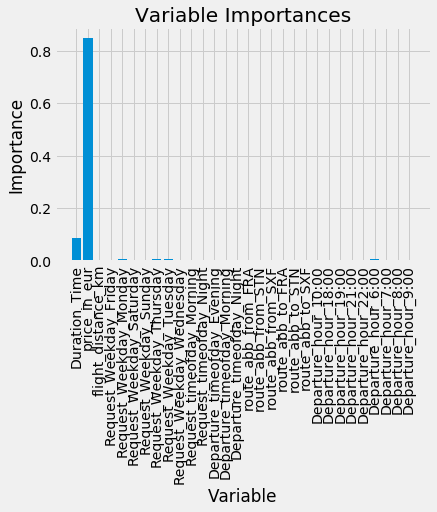

In [31]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');